[![preview notebook](https://img.shields.io/static/v1?label=render%20on&logo=github&color=87ce3e&message=GitHub)](https://github.com/open-atmos/PySDM/blob/main/examples/PySDM_examples/Jouzel_and_Merlivat_1984/fig_8_9.ipynb)
[![launch on mybinder.org](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=lab/tree/examples/PySDM_examples/Jouzel_and_Merlivat_1984/fig_8_9.ipynb)
[![launch on Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/Jouzel_and_Merlivat_1984/fig_8_9.ipynb)

# figs 8 and 9 from [Jouzel and Merlivat 1984](https://doi.org/10.1029/JD089iD07p11749) "_Deuterium and oxygen 18 in precipitation: Modeling of the isotopic effects during snow formation_"



In [1]:
import sys
if 'google.colab' in sys.modules:
    !pip --quiet install open-atmos-jupyter-utils
    from open_atmos_jupyter_utils import pip_install_on_colab
    pip_install_on_colab('PySDM-examples')

In [2]:
from matplotlib import pyplot
import numpy as np

from PySDM import Formulae
from PySDM_examples.Jouzel_and_Merlivat_1984.thermodynamic_profiles import ice_saturation_curve_4
from open_atmos_jupyter_utils import show_plot

In [3]:
formulae = Formulae(
    isotope_diffusivity_ratios="Stewart1975",
    isotope_equilibrium_fractionation_factors="Majoube1970",
    isotope_kinetic_fractionation_factors="JouzelAndMerlivat1984"
)
const = formulae.constants
svp = formulae.saturation_vapour_pressure
C2K = formulae.trivia.C2K
K2C = formulae.trivia.K2C

n_points = 100
T_0_50 = C2K(np.linspace(0.0, -50, n_points))

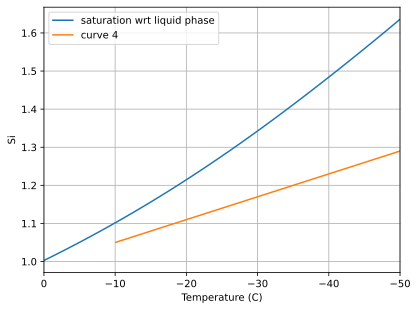

In [4]:
pyplot.plot(
    K2C(T_0_50),
    svp.pvs_water(T_0_50) / svp.pvs_ice(T_0_50),
    label='saturation wrt liquid phase',
)
pyplot.plot(
    K2C(T_0_50)[n_points//5:],
    ice_saturation_curve_4(const,T_0_50[n_points//5:]),
    label='curve 4',
)
pyplot.gca().set(
    ylabel='Si',
    xlabel='Temperature (C)',
    xlim=(K2C(T_0_50[0]), K2C(T_0_50[-1])),
)
pyplot.grid()
pyplot.legend()
show_plot('fig_8')

In [5]:
temperatures = C2K(np.array([-10., -20., -30.]))
alphas_eff = np.zeros((n_points, len(temperatures)))
Si = np.linspace(1.0, 1.4, n_points)
for i, T in enumerate(temperatures):
    alpha_s = formulae.isotope_equilibrium_fractionation_factors.alpha_i_18O(T)
    alpha_k = formulae.isotope_kinetic_fractionation_factors.alpha_kinetic(
        alpha_equilibrium=alpha_s,
        saturation=Si,
        D_ratio_heavy_to_light=formulae.isotope_diffusivity_ratios.ratio_18O_heavy_to_light(T)
    )
    alphas_eff[:, i] = alpha_k * alpha_s

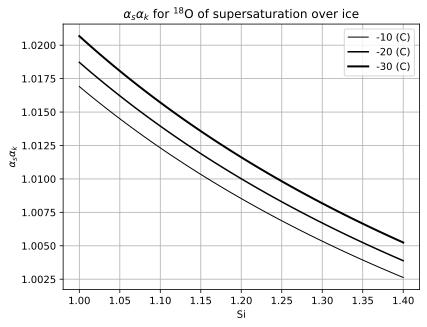

In [6]:
for i, T in enumerate(temperatures):
    pyplot.plot(
        Si,
        alphas_eff[:, i],
        label=f'{K2C(T):.5g} (C)',
        color='k',
        linewidth = 1 + i/2
    )
pyplot.gca().set(
    ylabel='$\\alpha_s\\alpha_k$',
    xlabel='Si',
    title = "$\\alpha_s\\alpha_k$ for $^{18}$O of saturation over ice"
)
pyplot.grid()
pyplot.legend()
show_plot('fig_9')